In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")



In [120]:
company = pd.read_csv("/content/Company_Data.csv")

In [121]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [122]:
company.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [123]:
company.shape

(400, 11)

In [124]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [125]:
company.isnull()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,False


In [126]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [127]:
# Create a new column 'Sales_Category' based on the threshold
threshold = 8
company['Sales_Category'] = ['High' if x > threshold else 'Low' for x in company['Sales']]

In [128]:
# Encode categorical variables
le = LabelEncoder()
company['ShelveLoc'] = le.fit_transform(company['ShelveLoc'])
company['Urban'] = le.fit_transform(company['Urban'])
company['US'] = le.fit_transform(company['US'])

In [129]:
# Define features and target
X = company[['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']]
y = company['Sales_Category']

In [130]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=40)

In [131]:
# Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=40)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=40),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [132]:
# Get the best parameters
best_params = grid_search.best_params_

In [133]:
# Train Decision Tree with best parameters
clf = DecisionTreeClassifier(**best_params, random_state=40)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10, random_state=40)

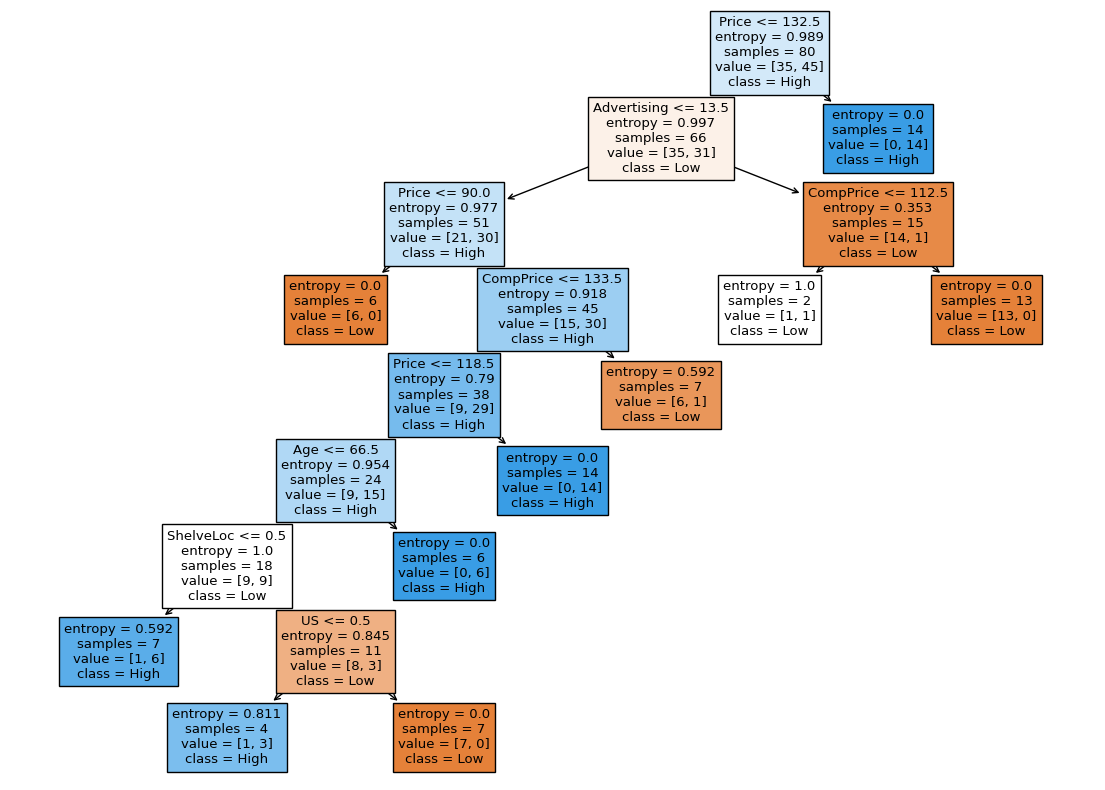

In [134]:
# Print the decision tree
feature_names = list(X.columns)
plt.figure(figsize=(14, 10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=['Low', 'High'])
plt.show()

In [135]:
# Predict the test data
y_pred = clf.predict(X_test)

# Print accuracy and evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Decision Tree Accuracy: 0.7125

Classification Report:
              precision    recall  f1-score   support

        High       0.62      0.72      0.67       129
         Low       0.79      0.71      0.75       191

    accuracy                           0.71       320
   macro avg       0.71      0.71      0.71       320
weighted avg       0.72      0.71      0.71       320


Confusion Matrix:
[[ 93  36]
 [ 56 135]]


In [136]:
# Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(**best_params, random_state=40),
                                       n_estimators=50, random_state=40)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        min_samples_leaf=2,
                                                        min_samples_split=10,
                                                        random_state=40),
                  n_estimators=50, random_state=40)

In [137]:
# Predict with Bagging
y_pred_bagging = bagging_classifier.predict(X_test)

# Print Bagging accuracy and evaluation metrics
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("\nBagging Accuracy:", accuracy_bagging)


Bagging Accuracy: 0.74375


In [138]:
# Boosting Classifier
boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=40)
boosting_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=40)

In [139]:
# Predict with Boosting
y_pred_boosting = boosting_classifier.predict(X_test)

In [140]:
# Print Boosting accuracy and evaluation metrics
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print("\nBoosting Accuracy:", accuracy_boosting)


Boosting Accuracy: 0.771875


In [141]:
x_column = 'Income'
y_column = 'Sales'

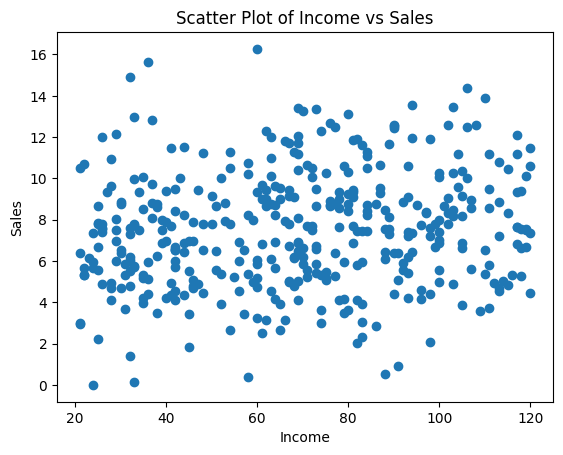

In [142]:
plt.scatter(company[x_column], company[y_column])
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Scatter Plot of {x_column} vs {y_column}')
plt.show()

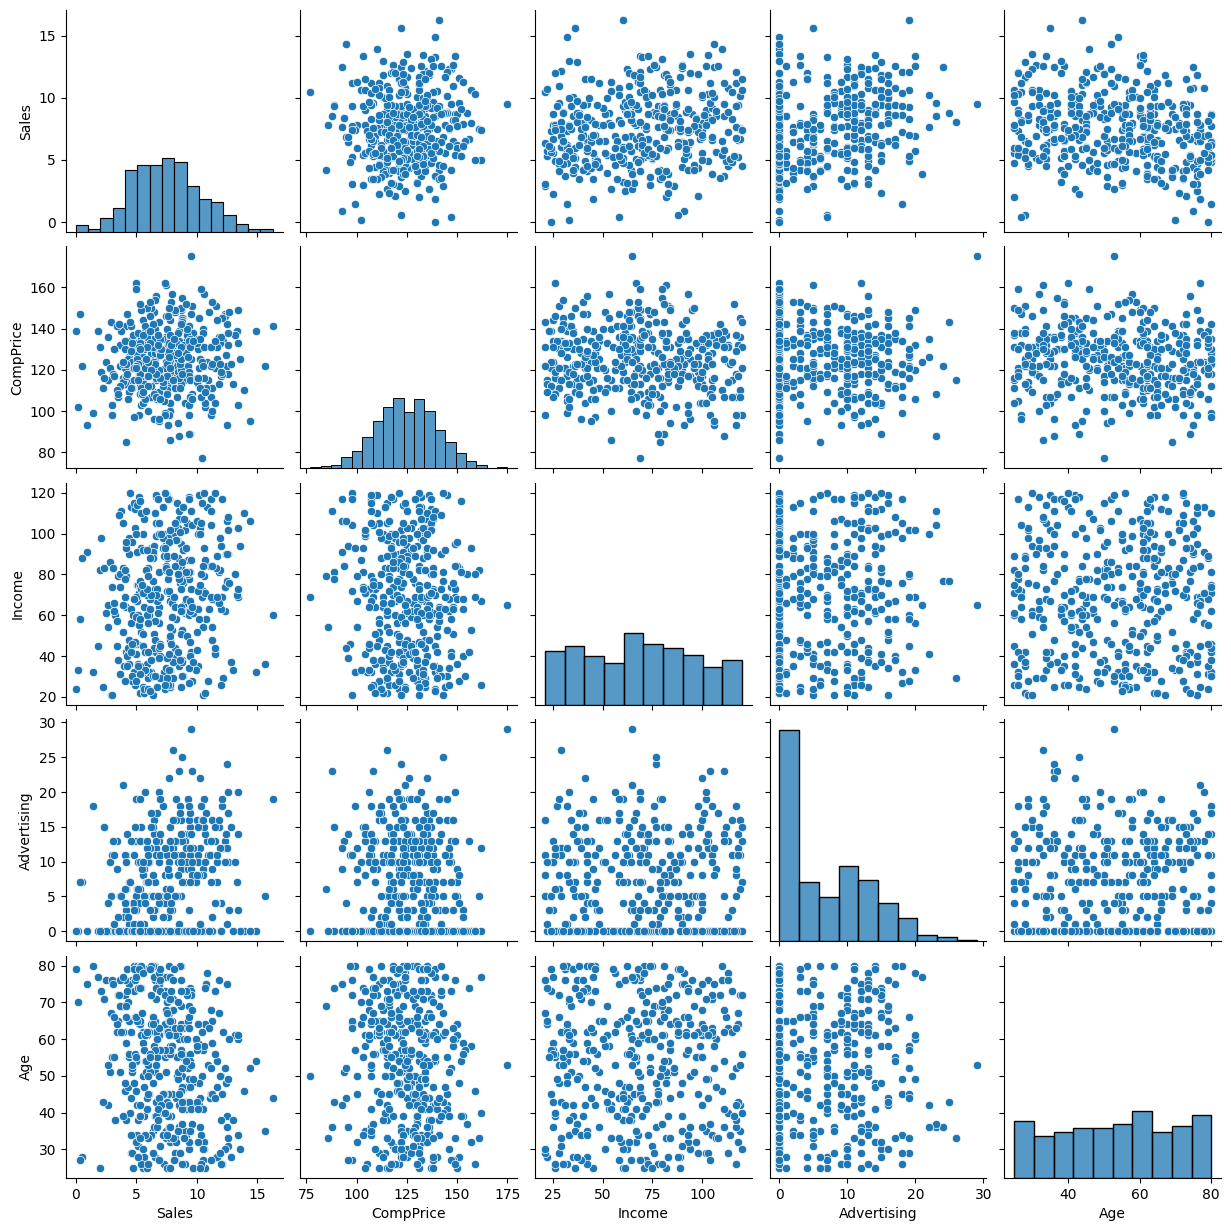

In [143]:
columns_to_plot = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Age']

sns.pairplot(company[columns_to_plot])
plt.show()

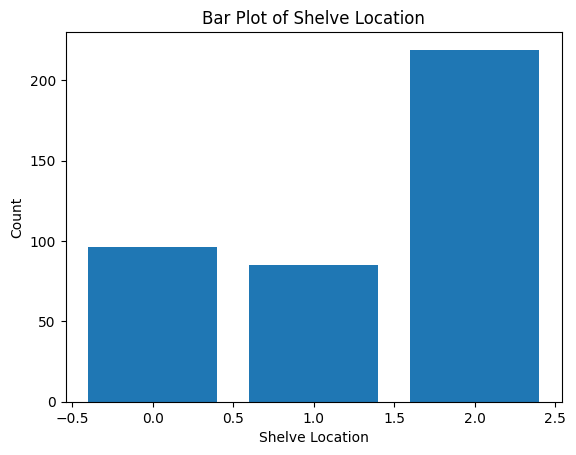

In [144]:
shelve_loc_counts = company['ShelveLoc'].value_counts()
plt.bar(shelve_loc_counts.index, shelve_loc_counts)
plt.xlabel('Shelve Location')
plt.ylabel('Count')
plt.title('Bar Plot of Shelve Location')
plt.show()

#Fraud_check Dataset

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
data=pd.read_csv("/content/Fraud_check.csv")

In [147]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [148]:
df = data.copy()

In [149]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [150]:
data.shape

(600, 6)

#creating x and y datasets

In [151]:
x=df.drop(['Taxable.Income'],axis=1)

In [152]:
x.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban'],
      dtype='object')

In [153]:
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO


#Transforming string data types to numeric

In [154]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()
x['Undergrad'] = label_encoder.fit_transform(x['Undergrad'])

In [155]:
x['Marital.Status']=label_encoder.fit_transform(x['Undergrad'])
x['Urban']= label_encoder.fit_transform(x['Urban'])

In [156]:
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,1
1,1,1,134075,18,1
2,0,0,160205,30,1
3,1,1,193264,15,1
4,0,0,27533,28,0


In [157]:
y=data[['Taxable.Income']]
y.head()

,Taxable.Income
0,68833
1,33700
2,36925
3,50190
4,81002


In [158]:
y['tax']=['risky' if x<=30000 else 'good' for x in y['Taxable.Income']]

In [159]:
y= y.drop(['Taxable.Income'],axis=1)
y.head(100)

,tax
0,good
1,good
2,good
3,good
4,good
...,...
95,good
96,risky
97,good
98,risky


#splitting data into training and testing data set

In [160]:
from sklearn.model_selection import train_test_split


In [161]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=40)


#building decision tree model


In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [163]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

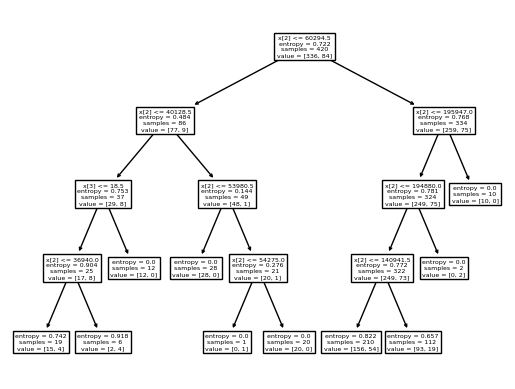

In [164]:
tree.plot_tree(model);

In [165]:
x.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban'],
      dtype='object')

In [166]:
y.columns

Index(['tax'], dtype='object')

In [167]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['good','risky']

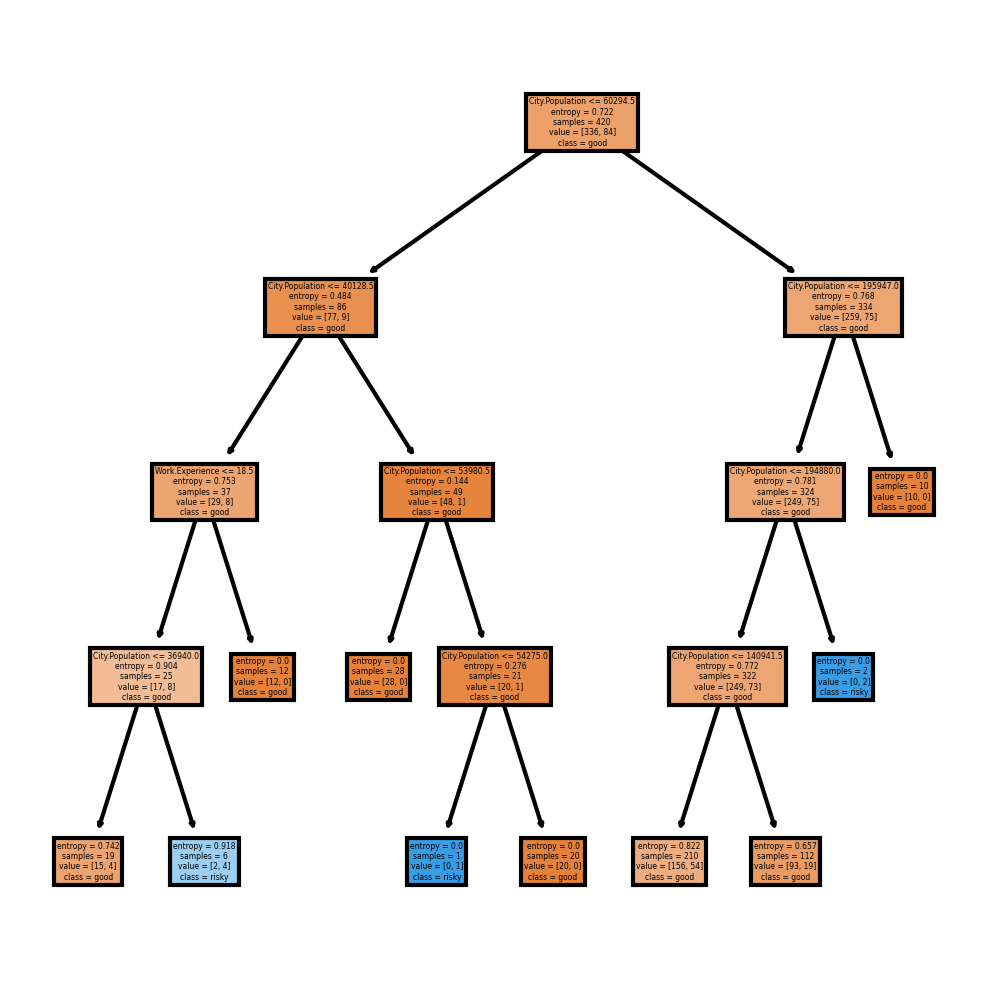

In [168]:
fig,axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

## predicting on test data

In [169]:
pred = model.predict(x_test)

In [170]:
pred

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
    

In [171]:
pd.Series(pred).value_counts()

good     177
risky      3
dtype: int64

In [172]:
model.score(x_test,y_test)

0.7611111111111111

In [173]:
columns = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experience', 'Urban']


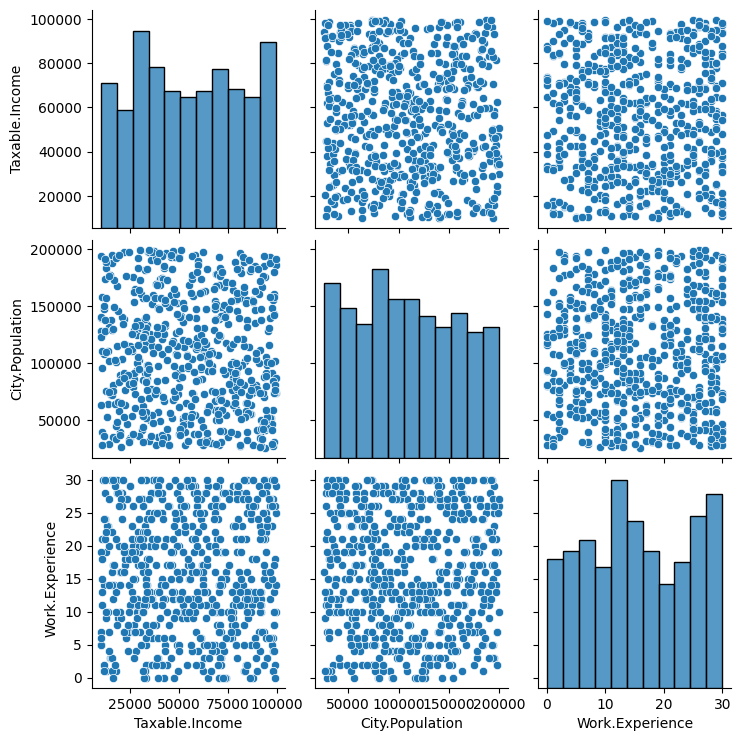

In [174]:
sns.pairplot(df[columns])
plt.show()

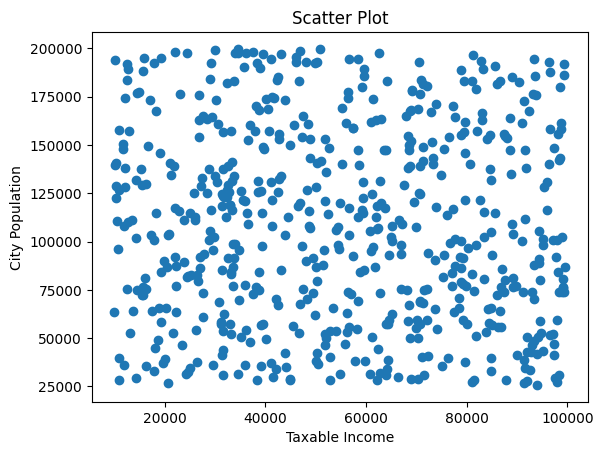

In [175]:
# Creating scatter plot
plt.scatter(df['Taxable.Income'], df['City.Population'])
plt.xlabel('Taxable Income')
plt.ylabel('City Population')
plt.title('Scatter Plot')
plt.show()

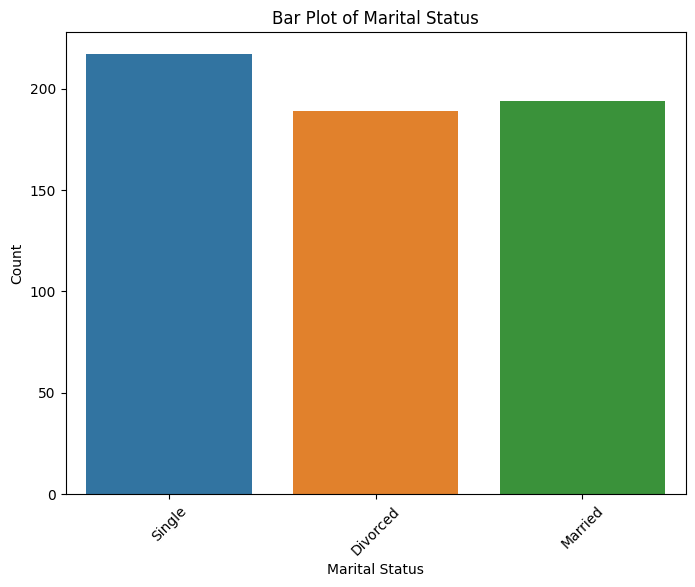

In [176]:
# Creating bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df,x='Marital.Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Bar Plot of Marital Status')
plt.xticks(rotation=45)
plt.show()